In [1]:
#importando bibliotecas
from sklearn.decomposition import NMF
#importando pandas para o dataset
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#biblioteca do kmeans
from sklearn.cluster import KMeans

from IPython.display import Image
from pathlib import Path


config_dirs = open("prefixo_dados.txt").readlines() 
DIR_PREFIXO = Path(config_dirs[0].strip())


DIRETORIO_PRINCIPAL =  DIR_PREFIXO / "Projeto_PA" / "Projeto_PA_validado"
DIR_MODIFICADO = DIRETORIO_PRINCIPAL / "dataset_modificado"
DIR_NMF = DIRETORIO_PRINCIPAL / "NMF"
DIRETORIO_DATASET = DIR_PREFIXO / "Projeto_PA"

#DIRETORIO_PRINCIPAL = Path(r"D:\Projeto_PA")


In [2]:
#leitura do arquivo
dados_mapa = pd.read_csv(DIRETORIO_PRINCIPAL / "padrao_doenca" / "classificados_por_padroes_de_doenca_estatistica.csv",sep=';')
#dados_mapa = pd.read_csv(DIRETORIO_DATASET / "dataset_modificado" / "pacientes_com_todas_medidas.csv",sep=';')
#dados_mapa = pd.read_csv(DIRETORIO_DATASET / "dataset_modificado" / "pacientes_para_NMF.csv",sep=';', encoding="Latin1")
#dados_mapa = DIRETORIO_PRINCIPAL / "padrao_doenca" / 'idosos_classificados_por_padroes_de_doenca_estatistica.csv', 

#data = pd.read_csv(r"D:\Projeto_PA\dataset_modificado\pacientes_aceitos.csv",sep=';', encoding="Latin1")
# D:\Projeto_PA\Projeto_PA_validado\padrao_doenca


In [3]:
#verificar nome das colunas
print (list(dados_mapa.columns))

['numero_identificacao', 'data_nascimento', 'genero', 'idade', 'peso', 'altura', 'data_exame', 'sist 9:00', 'sist 9:15', 'sist 9:30', 'sist 9:45', 'sist 10:00', 'sist 10:15', 'sist 10:30', 'sist 10:45', 'sist 11:00', 'sist 11:15', 'sist 11:30', 'sist 11:45', 'sist 12:00', 'sist 12:15', 'sist 12:30', 'sist 12:45', 'sist 13:00', 'sist 13:15', 'sist 13:30', 'sist 13:45', 'sist 14:00', 'sist 14:15', 'sist 14:30', 'sist 14:45', 'sist 15:00', 'sist 15:15', 'sist 15:30', 'sist 15:45', 'sist 16:00', 'sist 16:15', 'sist 16:30', 'sist 16:45', 'sist 17:00', 'sist 17:15', 'sist 17:30', 'sist 17:45', 'sist 18:00', 'sist 18:15', 'sist 18:30', 'sist 18:45', 'sist 19:00', 'sist 19:15', 'sist 19:30', 'sist 19:45', 'sist 20:00', 'sist 20:15', 'sist 20:30', 'sist 20:45', 'sist 21:00', 'sist 21:15', 'sist 21:30', 'sist 21:45', 'sist 22:00', 'sist 22:15', 'sist 22:30', 'sist 22:45', 'sist 23:00', 'sist 23:30', 'sist 0:00', 'sist 0:30', 'sist 1:00', 'sist 1:30', 'sist 2:00', 'sist 2:30', 'sist 3:00', 'sist 

In [4]:
# Separar os campos que serao utilizados
dados_mapa_original = dados_mapa
medidas = pd.concat((dados_mapa.loc[:, "numero_identificacao"], dados_mapa.loc[:, "sist 9:00": "diast 8:45"]), axis=1)
# data = pd.concat((data.loc[:, "numero_identificacao"], data.loc[:, "idade"], data.loc[:, "sist 9:00": "diast 8:45"]), axis=1)

medidas

#dados_mapa = dados_mapa.drop(['data_nascimento','genero','idade','peso','altura','data_exame', 'whitecoat'],axis=1)
#dados_mapa = dados_mapa.drop(['Unnamed: 0','data_nascimento','genero','idade','peso','altura','data_exame', 'whitecoat'],axis=1)

,numero_identificacao,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,...,diast 6:30,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
0,4,105.0,108.0,116.0,104.0,106.0,98.0,102.0,107.0,NaN,...,41.0,NaN,NaN,NaN,NaN,67.0,61.0,69.0,62.0,51.0
1,5,103.0,114.0,82.0,104.0,98.0,106.0,108.0,107.0,109.0,...,NaN,NaN,74.0,NaN,NaN,NaN,60.0,74.0,70.0,67.0
2,6,147.0,148.0,156.0,140.0,130.0,132.0,121.0,113.0,149.0,...,80.0,86.0,93.0,NaN,NaN,NaN,86.0,87.0,82.0,82.0
3,7,140.0,139.0,142.0,137.0,135.0,177.0,148.0,152.0,135.0,...,49.0,56.0,62.0,83.0,104.0,NaN,NaN,89.0,90.0,72.0
4,8,NaN,110.0,101.0,108.0,111.0,111.0,114.0,115.0,113.0,...,64.0,NaN,NaN,93.0,68.0,91.0,NaN,NaN,81.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19556,21786,163.0,198.0,172.0,148.0,161.0,156.0,156.0,138.0,107.0,...,102.0,114.0,126.0,NaN,NaN,NaN,123.0,121.0,119.0,123.0
19557,21787,114.0,120.0,164.0,116.0,119.0,126.0,123.0,122.0,122.0,...,87.0,73.0,59.0,74.0,68.0,86.0,96.0,107.0,106.0,93.0
19558,21788,107.0,110.0,103.0,NaN,NaN,NaN,114.0,144.0,128.0,...,49.0,50.0,50.0,53.0,52.0,62.0,68.0,61.0,64.0,60.0
19559,21792,94.0,107.0,112.0,124.0,120.0,94.0,102.0,113.0,104.0,...,NaN,NaN,64.0,76.0,72.0,69.0,75.0,74.0,69.0,67.0


## Matriz de Correlação das Medidas

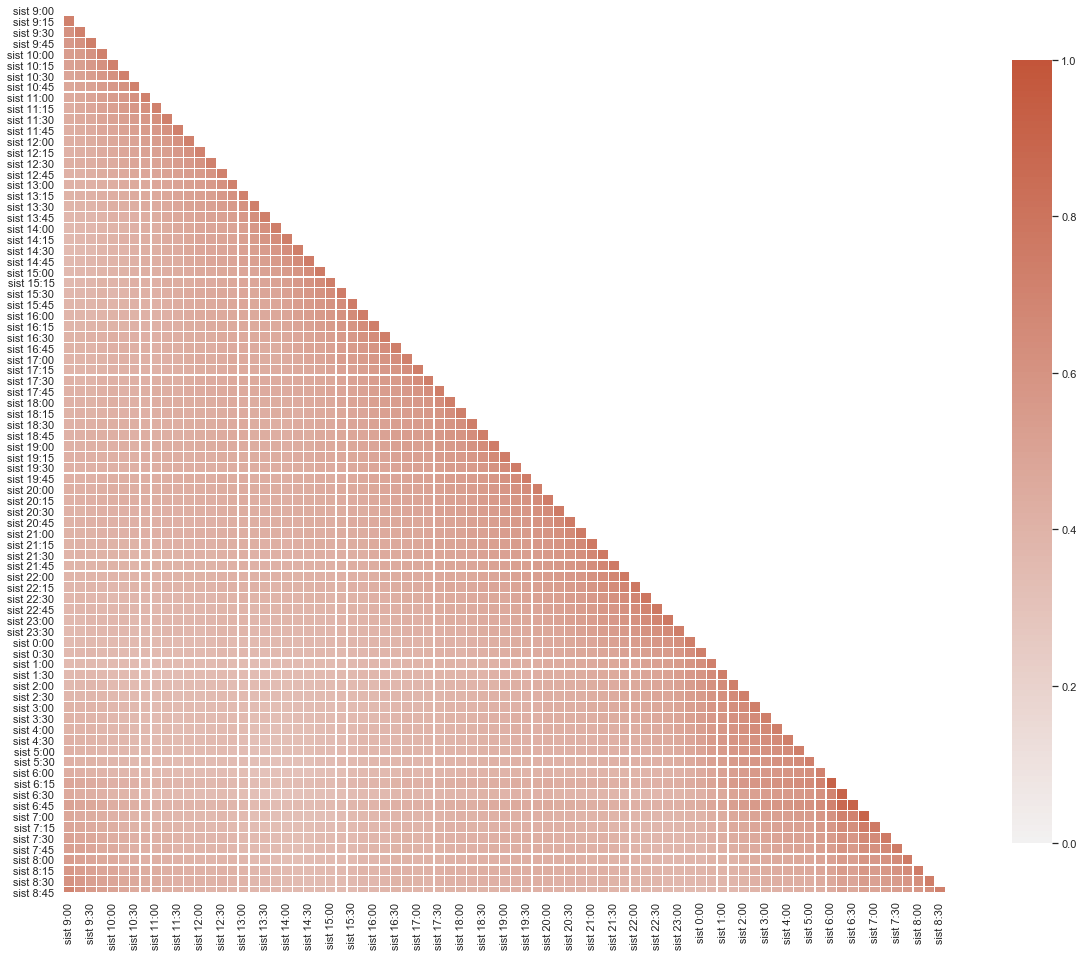

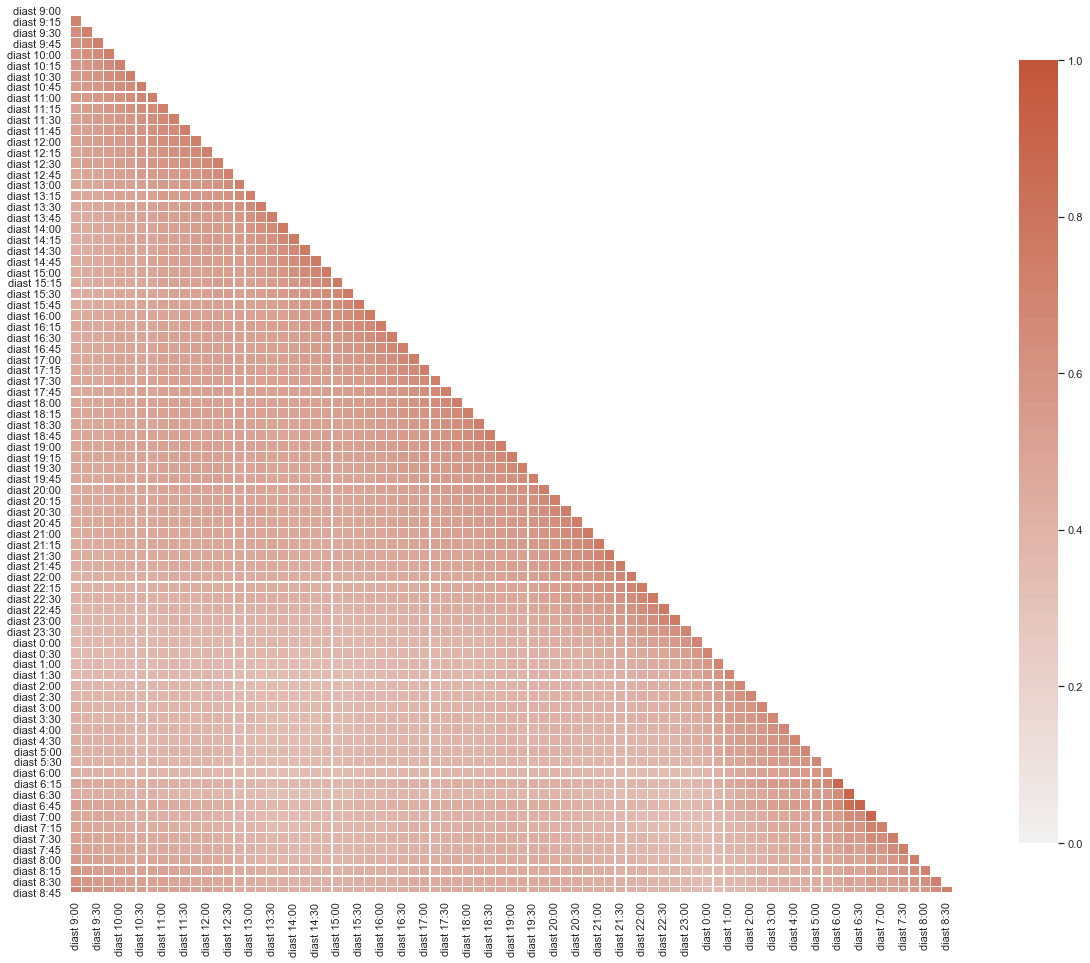

In [5]:
# Plotagem da Matriz de Correlação das variáveis Sistólica e Diastólica

sistolicas = dados_mapa.loc[:, "sist 9:00": "sist 8:45"]
correlacao_sist = sistolicas.corr(method='pearson')
diastolicas = dados_mapa.loc[:, "diast 9:00": "diast 8:45"]
correlacao_diast = diastolicas.corr(method='pearson')


def grafico_correlacao(corr):
    
    sns.set_theme(style="white")

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(20, 18))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, vmin=0, vmax=1, mask=mask, cmap=cmap,  center=0,
                square=True, linewidths=.2, cbar_kws={"shrink": .8})
    
    plt.show()

grafico_correlacao(correlacao_sist)
grafico_correlacao(correlacao_diast)

## Tratamento de nulos

In [6]:
#verificar a quantidade de nulos em cada linha

medidas.isnull().sum()

numero_identificacao       0
sist 9:00               6409
sist 9:15               5484
sist 9:30               5535
sist 9:45               5538
                        ... 
diast 7:45              3295
diast 8:00              3945
diast 8:15              4456
diast 8:30              4862
diast 8:45              6115
Length: 165, dtype: int64

In [7]:
#trocar Nan por 0
medidas_sem_nan = medidas.fillna(0)

In [8]:
#verificando se existe nulos
medidas_sem_nan.isnull().sum()

numero_identificacao    0
sist 9:00               0
sist 9:15               0
sist 9:30               0
sist 9:45               0
                       ..
diast 7:45              0
diast 8:00              0
diast 8:15              0
diast 8:30              0
diast 8:45              0
Length: 165, dtype: int64

## K-means - identifica o melhor numero de componentes para aplicar o NMF

In [9]:
#Funções para calcular o melhor número de cluster gerado pelo Dataset

def calculate_wcss(medidas_sem_nan):
    """
    Calcula a soma dos quadrados intra-clusters para 19
    quantidades de clusters, iniciando com o mínimo de 2 clusters
    
    Parametros
    ----------
    data : DataFrame
        conjunto de dados para fazer o `.fit()` do K-Means

    
    Returns
    -------
    wcss : lista contendo os valores de soma de quadrados intra-cluster
    """
    
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=medidas_sem_nan)
        wcss.append(kmeans.inertia_)

    return wcss

def optimal_number_of_clusters(wcss):
    """
    Calcula a maior distância entre os pontos que marcam as 
    somas dos quadrados intra-clusters para 19 calculadas 
    com `calculate_wcss()`
    
    Parametros
    ----------
    wcss : lista
        lista contendo os valores de soma de quadrados intra-cluster

    
    Returns
    -------
    int : número de clusters 
    """
    from math import sqrt
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]

        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    return distances.index(max(distances)) + 2

In [10]:
#tirando a variavel numero de identificação 
dados_sem_id = medidas_sem_nan.drop(['numero_identificacao'],axis=1)

In [11]:
#calculando a quantidade ótima de clusters (é possivel dividir os pacientes em quantos grupos)
sum_of_squares = calculate_wcss(dados_sem_id)
numero_otimo_cluster = optimal_number_of_clusters(sum_of_squares)
print (numero_otimo_cluster)

8


In [12]:
#convertendo os dados para a clusterização
# converte de DataFrame para Array por causa do K-Means
# 
X = np.array(dados_sem_id)

In [13]:
#habilitando o kmeans com numero otimo de grupos (calculado na etapa anterior)
kmeans = KMeans(n_clusters=numero_otimo_cluster, random_state=0).fit(X)

In [14]:
# Gera os números dos grupos 
# 
grupos = kmeans.fit_predict(X)

In [15]:
#  Inclui o grupo de cada paciente no Dataset de entrada
mapa_grupos = dados_mapa.loc[:,:'data_exame']
mapa_grupos['grupo'] = grupos
mapa_grupos = pd.concat([mapa_grupos,dados_mapa.loc[:,'sist 9:00':'Picos Diastolica']],axis=1)

# Lista o dataset de entrada mostrando a coluna dos grupos
mapa_grupos

,numero_identificacao,data_nascimento,genero,idade,peso,altura,data_exame,grupo,sist 9:00,sist 9:15,...,Mediana Sistolica em 24h,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica
0,4,1923-10-05,M,94.0,85.0,160,2018-09-10 12:25:23,7,105.0,108.0,...,118.5,59.0,9545.5,4902.0,3748.0,841.5,16.52,11.36,11,34
1,5,1948-10-07,M,70.0,80.0,165,2018-12-26 07:39:41,7,103.0,114.0,...,106.0,62.0,8586.5,5034.5,2915.0,606.0,7.51,6.65,9,23
2,6,1999-03-23,M,19.0,100.0,197,2018-12-26 08:06:19,6,147.0,148.0,...,133.0,79.0,10674.0,6154.0,3721.0,751.5,12.70,13.01,19,19
3,7,1978-01-26,F,40.0,65.0,"1,64",2018-12-26 08:19:06,6,140.0,139.0,...,131.0,80.0,10679.5,6420.5,3642.0,602.5,16.13,10.34,21,9
4,8,1990-03-07,M,28.0,120.0,172,2018-12-26 08:26:59,7,NaN,110.0,...,115.0,78.0,9141.5,6118.0,2405.0,566.0,12.27,12.79,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19556,21786,1972-11-25,M,47.0,75.0,165,2020-09-10 16:03:08,4,163.0,198.0,...,152.0,116.0,12224.5,9265.0,2439.0,474.5,18.66,14.80,49,60
19557,21787,1970-10-19,M,49.0,90.0,183,2020-09-10 16:21:02,4,114.0,120.0,...,136.0,85.0,10970.0,6819.0,3319.0,738.0,17.22,13.67,32,27
19558,21788,1985-03-15,F,35.0,93.0,167,2020-09-10 16:44:53,4,107.0,110.0,...,112.0,62.0,9245.0,4935.5,3556.0,713.5,14.36,8.29,14,26
19559,21792,1952-04-21,F,68.0,64.0,160,2020-09-10 17:25:50,4,94.0,107.0,...,109.5,68.0,8989.5,5660.0,2815.5,460.0,14.14,9.38,19,13


## n Grupos de pacientes separados pelo Kmeans, sendo n=número ótimo de clusters

In [16]:
#grupo 0 tem 4968 pacientes
mapa_grupos[mapa_grupos['grupo']==0]

,numero_identificacao,data_nascimento,genero,idade,peso,altura,data_exame,grupo,sist 9:00,sist 9:15,...,Mediana Sistolica em 24h,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica
8,12,1994-11-26,M,24.0,65.0,175,2018-12-26 10:04:10,0,NaN,118.0,...,112.0,63.0,9116.5,5149.0,3268.0,655.5,8.93,9.65,10,28
9,13,1963-06-23,D,55.0,60.0,158,2018-12-26 10:04:36,0,NaN,NaN,...,117.0,70.0,9767.5,6112.0,3093.0,506.0,19.92,15.62,19,22
12,17,1976-05-20,M,42.0,87.0,175,2018-12-26 10:12:44,0,NaN,NaN,...,132.5,88.5,10621.0,7194.0,2801.0,610.0,17.55,14.13,20,26
25,30,1955-06-17,M,63.0,68.0,164,2018-12-26 13:17:20,0,175.0,NaN,...,120.0,82.0,9891.0,6817.0,2527.5,497.0,14.73,13.62,10,18
38,46,1944-11-30,F,74.0,54.0,155,2018-12-27 07:58:37,0,NaN,NaN,...,133.0,66.5,10688.0,5344.5,4485.5,806.0,15.16,7.74,12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19494,21710,1959-06-11,F,61.0,66.0,150,2020-09-09 13:58:16,0,NaN,NaN,...,119.5,67.0,10241.5,5582.0,3981.0,628.5,20.52,12.73,14,21
19523,21746,1953-02-19,NaN,67.0,60.0,161,2020-09-10 09:54:05,0,NaN,NaN,...,123.0,67.0,10003.0,5389.0,3829.5,720.0,16.97,8.39,14,13
19532,21755,1953-12-11,F,66.0,60.0,163,2020-09-10 10:48:47,0,NaN,NaN,...,110.0,72.0,8914.5,5700.5,2634.0,548.5,11.13,8.90,18,12
19533,21756,1935-11-06,F,84.0,80.0,"1,67",2020-09-10 11:04:38,0,NaN,NaN,...,131.0,61.0,10291.0,4948.5,4353.5,920.5,21.06,8.20,23,33


In [17]:
#grupo 1 tem 2063 pacientes
mapa_grupos[mapa_grupos['grupo']==1]

,numero_identificacao,data_nascimento,genero,idade,peso,altura,data_exame,grupo,sist 9:00,sist 9:15,...,Mediana Sistolica em 24h,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica
22,27,1990-05-26,M,28.0,140.0,177,2018-12-26 11:07:49,1,161.0,127.0,...,127.0,71.5,10322.0,6062.0,3676.5,554.5,16.86,10.93,16,8
59,67,1987-11-29,F,31.0,64.0,163,2018-12-27 10:44:42,1,NaN,114.0,...,119.0,70.5,9573.0,5651.5,3227.0,646.0,11.51,10.85,6,18
62,71,1951-08-05,F,67.0,58.0,149,2018-12-27 11:28:55,1,109.0,108.0,...,109.0,70.5,9312.5,5626.5,3082.5,549.5,16.46,10.91,22,15
85,96,1953-03-15,M,65.0,74.0,175,2018-12-28 10:56:02,1,135.0,120.0,...,125.0,86.0,10270.5,7021.5,2758.0,474.0,10.62,8.17,12,26
89,100,1938-11-06,F,80.0,74.0,159,2018-12-28 11:55:54,1,NaN,NaN,...,163.0,84.0,12575.5,6882.0,4752.0,845.0,27.59,13.32,53,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19531,21754,1953-12-20,F,66.0,68.0,158,2020-09-10 10:44:17,1,NaN,NaN,...,128.0,72.0,10624.0,5794.0,4007.5,802.5,18.89,12.24,26,19
19534,21757,1990-05-25,F,30.0,70.0,"1,55",2020-09-10 11:08:52,1,NaN,143.0,...,127.0,85.0,10287.5,6830.0,2751.0,635.0,11.67,8.13,8,15
19537,21760,1983-05-27,M,37.0,89.0,175,2020-09-10 11:24:21,1,126.0,134.0,...,125.0,89.0,10436.5,7411.0,2493.5,483.0,19.39,17.25,19,31
19539,21763,1976-09-02,M,44.0,91.0,176,2020-09-10 11:32:47,1,118.0,117.0,...,117.0,82.0,9464.5,6347.0,2593.0,503.0,9.75,11.20,8,14


In [18]:
#grupo 2 tem 1963 pacientes
mapa_grupos[mapa_grupos['grupo']==2]

,numero_identificacao,data_nascimento,genero,idade,peso,altura,data_exame,grupo,sist 9:00,sist 9:15,...,Mediana Sistolica em 24h,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica
7,11,1974-04-29,M,44.0,81.0,176,2018-12-26 10:01:51,2,NaN,NaN,...,111.0,74.0,9001.5,5952.5,2469.5,525.5,8.59,8.47,8,7
10,14,1932-05-28,F,86.0,59.0,149,2018-12-26 10:06:10,2,NaN,NaN,...,108.0,66.0,8810.5,5280.5,2900.5,574.0,8.15,7.86,11,16
15,20,1941-04-05,M,77.0,60.0,164,2018-12-26 10:20:31,2,NaN,NaN,...,125.0,76.0,10476.5,6266.5,3370.0,780.5,18.99,11.46,19,11
16,21,1960-07-07,F,58.0,53.0,150,2018-12-26 10:23:39,2,NaN,NaN,...,117.0,78.0,9521.0,6284.0,2655.5,535.5,11.75,8.63,7,6
19,24,1980-01-19,F,38.0,85.0,170,2018-12-26 10:37:07,2,NaN,NaN,...,119.0,89.0,9809.5,7159.5,2083.5,532.5,8.86,10.18,3,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19522,21745,1950-01-23,M,70.0,89.0,172,2020-09-10 09:49:46,2,NaN,NaN,...,118.0,74.0,9442.5,5825.5,3008.5,585.0,10.12,10.48,8,14
19524,21747,1953-01-20,M,67.0,69.0,167,2020-09-10 09:54:14,2,138.0,NaN,...,127.0,88.5,10144.5,6943.5,2627.0,536.0,12.84,11.62,9,34
19525,21748,1976-12-24,M,43.0,122.0,"1,82",2020-09-10 10:12:12,2,124.0,NaN,...,125.0,78.0,9998.0,6157.0,3132.0,651.0,9.95,9.80,3,12
19527,21750,1968-03-19,M,52.0,94.0,183,2020-09-10 10:24:08,2,NaN,NaN,...,153.5,73.0,12026.0,5719.0,5454.5,791.0,20.67,10.35,56,14


In [19]:
#grupo 3 tem 3370 pacientes
mapa_grupos[mapa_grupos['grupo']==3]

,numero_identificacao,data_nascimento,genero,idade,peso,altura,data_exame,grupo,sist 9:00,sist 9:15,...,Mediana Sistolica em 24h,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica
5,9,1982-04-28,M,36.0,100.0,185,2018-12-26 09:56:35,3,NaN,NaN,...,141.0,104.5,11583.0,8198.0,2783.5,558.5,10.83,12.82,37,52
11,15,1933-02-16,F,85.0,68.0,151,2018-12-26 10:08:12,3,NaN,NaN,...,136.5,74.0,11307.5,6435.5,3922.0,868.5,16.56,9.47,26,4
14,19,1981-12-16,M,37.0,85.0,164,2018-12-26 10:18:07,3,NaN,NaN,...,118.0,79.5,9837.0,6359.5,3002.0,470.0,13.82,11.01,10,16
21,26,1952-04-20,F,66.0,58.0,148,2018-12-26 10:50:47,3,164.0,173.0,...,141.5,81.5,11514.5,6473.0,4025.5,959.0,20.72,17.77,37,28
40,48,1979-11-22,M,39.0,92.0,181,2018-12-27 08:26:09,3,111.0,114.0,...,113.0,76.0,9159.5,6026.5,2557.5,527.0,9.82,8.00,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19509,21730,1990-12-16,M,29.0,100.0,"1,85",2020-09-10 08:41:56,3,119.0,115.0,...,117.0,77.0,9377.5,6089.0,2676.0,579.0,11.88,10.81,6,14
19510,21732,1957-11-27,F,62.0,66.0,"1,58",2020-09-10 08:47:41,3,159.0,159.0,...,145.5,95.0,11944.5,7859.0,3390.0,644.0,14.67,8.71,49,60
19511,21733,1981-09-25,M,38.0,96.0,"1,79",2020-09-10 08:49:36,3,NaN,112.0,...,114.0,71.0,9193.5,5838.5,2775.0,540.0,7.93,7.33,4,5
19516,21739,1964-03-12,F,56.0,68.0,"1,70",2020-09-10 09:14:30,3,NaN,187.0,...,176.0,118.5,14223.0,9764.0,3699.5,704.0,18.05,12.99,68,69


In [20]:
#grupo 4 tem 2788 pacientes
mapa_grupos[mapa_grupos['grupo']==4]

,numero_identificacao,data_nascimento,genero,idade,peso,altura,data_exame,grupo,sist 9:00,sist 9:15,...,Mediana Sistolica em 24h,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica
33,40,1962-01-01,M,56.0,85.0,"1,77",2018-12-26 16:19:28,4,122.0,115.0,...,122.0,80.0,9861.5,6198.0,3103.5,523.5,10.69,8.57,5,5
35,42,1969-10-11,F,49.0,74.0,"1,63",2018-12-26 17:28:58,4,111.0,118.0,...,125.0,88.0,10280.5,7302.0,2422.5,512.0,12.74,12.18,4,22
65,74,1987-12-17,M,31.0,72.0,"1,58",2018-12-27 14:58:52,4,60.0,121.0,...,126.0,73.0,10023.5,5786.0,3403.5,751.5,16.15,12.88,13,21
70,79,1944-01-16,M,74.0,80.0,"1,65",2018-12-27 16:17:46,4,146.0,162.0,...,138.0,74.0,10637.0,5537.5,4198.0,847.0,17.09,10.94,29,7
71,80,1961-05-24,F,57.0,NaN,NaN,2018-12-27 16:21:20,4,108.0,99.0,...,109.5,71.0,9012.0,5746.0,2673.0,560.0,10.44,12.41,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19556,21786,1972-11-25,M,47.0,75.0,165,2020-09-10 16:03:08,4,163.0,198.0,...,152.0,116.0,12224.5,9265.0,2439.0,474.5,18.66,14.80,49,60
19557,21787,1970-10-19,M,49.0,90.0,183,2020-09-10 16:21:02,4,114.0,120.0,...,136.0,85.0,10970.0,6819.0,3319.0,738.0,17.22,13.67,32,27
19558,21788,1985-03-15,F,35.0,93.0,167,2020-09-10 16:44:53,4,107.0,110.0,...,112.0,62.0,9245.0,4935.5,3556.0,713.5,14.36,8.29,14,26
19559,21792,1952-04-21,F,68.0,64.0,160,2020-09-10 17:25:50,4,94.0,107.0,...,109.5,68.0,8989.5,5660.0,2815.5,460.0,14.14,9.38,19,13


In [21]:
#grupo 5 tem 3397 pacientes
mapa_grupos[mapa_grupos['grupo']==5]

,numero_identificacao,data_nascimento,genero,idade,peso,altura,data_exame,grupo,sist 9:00,sist 9:15,...,Mediana Sistolica em 24h,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica
27,33,1982-09-03,F,36.0,71.0,163,2018-12-26 13:50:59,5,108.0,114.0,...,122.0,68.0,9739.0,5426.5,3495.5,767.0,11.64,11.94,7,23
28,34,1957-06-24,M,61.0,72.0,"1,74",2018-12-26 14:20:27,5,134.0,132.0,...,118.0,79.5,9624.0,6421.5,2602.5,554.0,14.21,10.27,11,14
29,35,1964-11-28,M,54.0,74.0,"1,58",2018-12-26 15:14:33,5,130.0,103.0,...,127.0,90.0,10380.0,7101.0,2744.0,501.5,19.03,14.79,21,36
30,36,1958-01-17,F,60.0,80.0,"1,64",2018-12-26 15:41:20,5,120.0,124.0,...,120.0,74.0,9734.0,6141.5,2999.5,557.0,8.81,8.92,2,7
52,60,1972-09-30,M,46.0,94.0,178,2018-12-27 09:48:51,5,147.0,NaN,...,129.0,80.0,10410.0,6495.5,3268.0,612.0,9.98,8.34,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19549,21774,1947-12-10,F,72.0,72.0,161,2020-09-10 14:25:22,5,137.0,153.0,...,127.0,66.0,10447.5,5407.0,4209.0,771.0,12.48,10.37,15,19
19551,21776,1965-11-16,F,54.0,71.0,167,2020-09-10 14:50:20,5,121.0,119.0,...,117.0,72.0,9439.0,5878.0,2758.5,769.0,12.20,10.10,7,12
19552,21779,1947-04-19,F,73.0,71.0,159,2020-09-10 15:13:35,5,137.0,121.0,...,114.0,68.0,9369.5,5393.5,3321.0,604.0,13.71,10.41,14,19
19553,21781,1947-04-18,F,73.0,92.0,168,2020-09-10 15:18:46,5,153.0,149.0,...,148.0,93.0,11726.0,7390.0,3668.0,618.0,20.56,12.37,47,40


In [22]:
#grupo 6 tem 2391 pacientes
mapa_grupos[mapa_grupos['grupo']==6]

,numero_identificacao,data_nascimento,genero,idade,peso,altura,data_exame,grupo,sist 9:00,sist 9:15,...,Mediana Sistolica em 24h,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica
2,6,1999-03-23,M,19.0,100.0,197,2018-12-26 08:06:19,6,147.0,148.0,...,133.0,79.0,10674.0,6154.0,3721.0,751.5,12.70,13.01,19,19
3,7,1978-01-26,F,40.0,65.0,"1,64",2018-12-26 08:19:06,6,140.0,139.0,...,131.0,80.0,10679.5,6420.5,3642.0,602.5,16.13,10.34,21,9
6,10,1965-09-18,M,53.0,89.0,174,2018-12-26 09:59:12,6,122.0,119.0,...,121.5,76.0,9821.5,6122.5,3111.5,538.0,10.51,10.24,5,10
13,18,1953-04-18,F,65.0,72.0,172,2018-12-26 10:15:40,6,142.0,123.0,...,139.0,87.0,11003.5,6952.5,3237.0,735.5,18.78,14.23,37,28
24,29,1952-05-18,F,66.0,52.0,150,2018-12-26 12:53:17,6,162.0,162.0,...,137.0,62.0,10953.5,4989.5,5002.0,928.0,15.48,8.23,32,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19543,21767,1968-11-15,F,51.0,75.0,165,2020-09-10 13:30:24,6,120.0,120.0,...,127.0,90.0,10111.0,6892.5,2574.0,601.5,12.73,13.87,9,39
19544,21768,1964-09-26,F,55.0,71.0,157,2020-09-10 13:31:17,6,114.0,124.0,...,115.0,80.0,9316.5,6440.0,2402.0,426.0,13.05,11.73,11,20
19546,21771,1972-12-11,F,47.0,63.0,"1,58",2020-09-10 14:09:58,6,125.0,122.0,...,132.5,81.5,10659.0,6608.0,3437.0,567.5,10.07,7.81,11,10
19548,21773,1958-02-25,F,62.0,87.0,156,2020-09-10 14:23:15,6,133.0,200.0,...,148.0,91.0,11850.0,7257.5,3754.5,766.0,17.84,13.95,53,45


In [23]:
#grupo 7 tem 2391 pacientes
mapa_grupos[mapa_grupos['grupo']==7]

,numero_identificacao,data_nascimento,genero,idade,peso,altura,data_exame,grupo,sist 9:00,sist 9:15,...,Mediana Sistolica em 24h,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica
0,4,1923-10-05,M,94.0,85.0,160,2018-09-10 12:25:23,7,105.0,108.0,...,118.5,59.0,9545.5,4902.0,3748.0,841.5,16.52,11.36,11,34
1,5,1948-10-07,M,70.0,80.0,165,2018-12-26 07:39:41,7,103.0,114.0,...,106.0,62.0,8586.5,5034.5,2915.0,606.0,7.51,6.65,9,23
4,8,1990-03-07,M,28.0,120.0,172,2018-12-26 08:26:59,7,NaN,110.0,...,115.0,78.0,9141.5,6118.0,2405.0,566.0,12.27,12.79,10,11
17,22,1962-06-19,F,56.0,80.0,155,2018-12-26 10:27:20,7,112.0,131.0,...,108.0,68.0,8594.0,5428.0,2655.0,470.5,14.44,13.54,22,25
18,23,1956-09-01,F,62.0,73.0,160,2018-12-26 10:29:28,7,122.0,121.0,...,104.0,61.0,8597.0,5037.0,2987.5,540.0,14.21,10.31,25,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19518,21741,1938-02-06,F,82.0,71.0,"1,62",2020-09-10 09:17:50,7,NaN,NaN,...,112.0,60.0,8965.0,4851.0,3475.5,599.5,11.31,9.16,12,34
19526,21749,1964-10-23,F,55.0,83.0,161,2020-09-10 10:18:56,7,112.0,109.0,...,112.0,69.0,8987.5,5536.5,2843.5,550.5,11.09,11.33,16,25
19541,21765,1981-08-31,M,39.0,95.0,"1,89",2020-09-10 12:20:00,7,105.0,112.0,...,116.0,80.0,9388.5,6386.0,2499.5,476.0,8.99,8.86,3,7
19545,21769,1981-04-10,M,39.0,128.0,180,2020-09-10 13:54:43,7,131.0,129.0,...,115.0,79.0,9363.5,6168.0,2641.0,524.5,14.03,13.46,10,24


In [24]:
#grupo 8 tem 2391 pacientes
mapa_grupos[mapa_grupos['grupo']==8]

,numero_identificacao,data_nascimento,genero,idade,peso,altura,data_exame,grupo,sist 9:00,sist 9:15,...,Mediana Sistolica em 24h,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica


In [25]:
dados_sem_id

,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,sist 11:15,...,diast 6:30,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
0,105.0,108.0,116.0,104.0,106.0,98.0,102.0,107.0,0.0,0.0,...,41.0,0.0,0.0,0.0,0.0,67.0,61.0,69.0,62.0,51.0
1,103.0,114.0,82.0,104.0,98.0,106.0,108.0,107.0,109.0,100.0,...,0.0,0.0,74.0,0.0,0.0,0.0,60.0,74.0,70.0,67.0
2,147.0,148.0,156.0,140.0,130.0,132.0,121.0,113.0,149.0,128.0,...,80.0,86.0,93.0,0.0,0.0,0.0,86.0,87.0,82.0,82.0
3,140.0,139.0,142.0,137.0,135.0,177.0,148.0,152.0,135.0,136.0,...,49.0,56.0,62.0,83.0,104.0,0.0,0.0,89.0,90.0,72.0
4,0.0,110.0,101.0,108.0,111.0,111.0,114.0,115.0,113.0,112.0,...,64.0,0.0,0.0,93.0,68.0,91.0,0.0,0.0,81.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19556,163.0,198.0,172.0,148.0,161.0,156.0,156.0,138.0,107.0,76.0,...,102.0,114.0,126.0,0.0,0.0,0.0,123.0,121.0,119.0,123.0
19557,114.0,120.0,164.0,116.0,119.0,126.0,123.0,122.0,122.0,159.0,...,87.0,73.0,59.0,74.0,68.0,86.0,96.0,107.0,106.0,93.0
19558,107.0,110.0,103.0,0.0,0.0,0.0,114.0,144.0,128.0,104.0,...,49.0,50.0,50.0,53.0,52.0,62.0,68.0,61.0,64.0,60.0
19559,94.0,107.0,112.0,124.0,120.0,94.0,102.0,113.0,104.0,96.0,...,0.0,0.0,64.0,76.0,72.0,69.0,75.0,74.0,69.0,67.0


## Nonnegative Matrix Factorization 

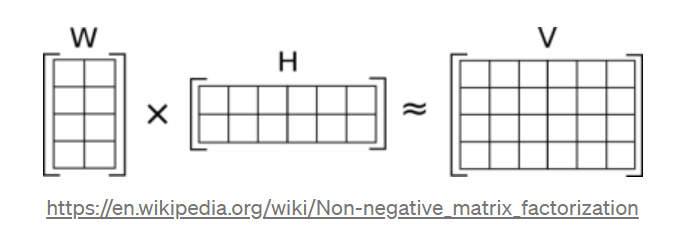

In [26]:
Image(filename=r"D:\Projeto_PA\dataset_modificado\imgs\Imagem1.png")

### O objetivo no NMF é decompor a matriz (V) pelo produto escalar de dois arrays W e H. As dimensões dos arrays são definidas pelas dimensões de V (valores do paciente) e pelo número de componentes que definimos para o algoritmo. Se V tem n linhas e x colunas e queremos decompor em k componentes, então W tem n linhas e k colunas e H tem k linhas e x colunas.

In [27]:
#aplicando o NMF com numero de componente = numero_otimo_cluster calculado pelo K-means
model = NMF(n_components=numero_otimo_cluster,init='random',random_state=0)

In [28]:
#tirando a variavel numero de identificação 
#entrada_NMF = dados_mapa.loc[:, 'sist 9:00':'diast 8:45'] 

In [29]:
# entrada_NMF
dados_sem_id

,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,sist 11:15,...,diast 6:30,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
0,105.0,108.0,116.0,104.0,106.0,98.0,102.0,107.0,0.0,0.0,...,41.0,0.0,0.0,0.0,0.0,67.0,61.0,69.0,62.0,51.0
1,103.0,114.0,82.0,104.0,98.0,106.0,108.0,107.0,109.0,100.0,...,0.0,0.0,74.0,0.0,0.0,0.0,60.0,74.0,70.0,67.0
2,147.0,148.0,156.0,140.0,130.0,132.0,121.0,113.0,149.0,128.0,...,80.0,86.0,93.0,0.0,0.0,0.0,86.0,87.0,82.0,82.0
3,140.0,139.0,142.0,137.0,135.0,177.0,148.0,152.0,135.0,136.0,...,49.0,56.0,62.0,83.0,104.0,0.0,0.0,89.0,90.0,72.0
4,0.0,110.0,101.0,108.0,111.0,111.0,114.0,115.0,113.0,112.0,...,64.0,0.0,0.0,93.0,68.0,91.0,0.0,0.0,81.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19556,163.0,198.0,172.0,148.0,161.0,156.0,156.0,138.0,107.0,76.0,...,102.0,114.0,126.0,0.0,0.0,0.0,123.0,121.0,119.0,123.0
19557,114.0,120.0,164.0,116.0,119.0,126.0,123.0,122.0,122.0,159.0,...,87.0,73.0,59.0,74.0,68.0,86.0,96.0,107.0,106.0,93.0
19558,107.0,110.0,103.0,0.0,0.0,0.0,114.0,144.0,128.0,104.0,...,49.0,50.0,50.0,53.0,52.0,62.0,68.0,61.0,64.0,60.0
19559,94.0,107.0,112.0,124.0,120.0,94.0,102.0,113.0,104.0,96.0,...,0.0,0.0,64.0,76.0,72.0,69.0,75.0,74.0,69.0,67.0


In [30]:
#aplicando o modelo NMF
model.fit(dados_sem_id)

NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0, max_iter=200,
    n_components=8, random_state=0, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [31]:
#  'Grupo x' sendo x = numero_otimo_cluster

#Criando H como resultado do produto escalar das matrizes
H = pd.DataFrame(np.round(model.components_,2), columns=dados_sem_id.columns)

H.index = [f'Grupo {i + 1}' for i in range(numero_otimo_cluster)]



In [32]:
#Foi criado "numero_otimo_cluster" grupos
H

,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,sist 11:15,...,diast 6:30,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
Grupo 1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.73,0.41,...,0.32,0.00,0.13,0.04,0.00,0.00,0.00,0.00,0.00,0.00
Grupo 2,15.65,11.55,6.39,1.94,0.00,0.00,0.00,0.00,0.00,0.40,...,1.07,0.00,0.00,0.00,0.00,0.00,0.23,2.34,5.34,8.61
Grupo 3,0.00,0.00,0.00,0.00,2.35,7.96,13.36,17.76,18.18,16.68,...,1.84,0.69,1.11,0.99,0.40,0.00,0.00,0.00,0.00,0.00
Grupo 4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.26,3.34,...,0.75,0.00,0.65,0.24,0.00,0.00,0.00,0.00,0.00,0.00
Grupo 5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,5.63,8.86,8.43,10.39,12.90,15.60,16.86,13.93,9.30,3.23
Grupo 6,0.11,5.09,9.94,14.39,14.97,11.08,6.42,2.36,0.00,0.00,...,0.97,1.06,1.32,0.83,0.65,0.23,0.17,0.00,0.00,0.00
Grupo 7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,6.07,6.21,5.59,5.45,4.27,1.97,0.00,0.00,0.00,0.00
Grupo 8,2.32,9.11,15.46,20.18,18.71,11.21,4.87,0.09,0.00,0.00,...,1.89,2.49,2.73,1.95,1.18,0.64,0.22,0.00,0.00,0.00


In [33]:
#Calcula a soma total por grupos
lista = []
for k in range(0,numero_otimo_cluster):
    sum_ = 0
    for i in H.columns:
        sum_ = sum_ + H.iloc[[k]][i]
    lista.append(sum_)

##### O grupo 5 é o que tem a maior soma total dos valores entre sist e diast, mesmo que grupo 2 tenha os maiores valores por variavel (sist) ele que tem a menor somar total


In [34]:
#o grupo com maior soma total é Grupo 6
lista

[Grupo 1    224.77
 dtype: float64, Grupo 2    399.54
 dtype: float64, Grupo 3    510.34
 dtype: float64, Grupo 4    535.48
 dtype: float64, Grupo 5    533.76
 dtype: float64, Grupo 6    359.62
 dtype: float64, Grupo 7    628.03
 dtype: float64, Grupo 8    469.38
 dtype: float64]

In [35]:
#Salvar a planilha
#H.to_excel('H.xlsx')

H.to_csv(DIR_NMF / "H.csv", sep=";", encoding="Latin1")

#H.to_csv(r"D:\Projeto_PA\NMF\H.csv", sep=";", encoding="Latin1")


In [36]:
#Criar gráficos para apresentar as diferenças entre os grupos. 
    
#################################################################################################
#Image(filename=r"D:\Projeto_PA\dataset_modificado\imgs\Grafico1.png")
#############################################################################################

In [37]:
dados_sem_id
#entrada_NMF

,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,sist 10:45,sist 11:00,sist 11:15,...,diast 6:30,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
0,105.0,108.0,116.0,104.0,106.0,98.0,102.0,107.0,0.0,0.0,...,41.0,0.0,0.0,0.0,0.0,67.0,61.0,69.0,62.0,51.0
1,103.0,114.0,82.0,104.0,98.0,106.0,108.0,107.0,109.0,100.0,...,0.0,0.0,74.0,0.0,0.0,0.0,60.0,74.0,70.0,67.0
2,147.0,148.0,156.0,140.0,130.0,132.0,121.0,113.0,149.0,128.0,...,80.0,86.0,93.0,0.0,0.0,0.0,86.0,87.0,82.0,82.0
3,140.0,139.0,142.0,137.0,135.0,177.0,148.0,152.0,135.0,136.0,...,49.0,56.0,62.0,83.0,104.0,0.0,0.0,89.0,90.0,72.0
4,0.0,110.0,101.0,108.0,111.0,111.0,114.0,115.0,113.0,112.0,...,64.0,0.0,0.0,93.0,68.0,91.0,0.0,0.0,81.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19556,163.0,198.0,172.0,148.0,161.0,156.0,156.0,138.0,107.0,76.0,...,102.0,114.0,126.0,0.0,0.0,0.0,123.0,121.0,119.0,123.0
19557,114.0,120.0,164.0,116.0,119.0,126.0,123.0,122.0,122.0,159.0,...,87.0,73.0,59.0,74.0,68.0,86.0,96.0,107.0,106.0,93.0
19558,107.0,110.0,103.0,0.0,0.0,0.0,114.0,144.0,128.0,104.0,...,49.0,50.0,50.0,53.0,52.0,62.0,68.0,61.0,64.0,60.0
19559,94.0,107.0,112.0,124.0,120.0,94.0,102.0,113.0,104.0,96.0,...,0.0,0.0,64.0,76.0,72.0,69.0,75.0,74.0,69.0,67.0


In [38]:
#Gera o W com numero do paciente, para verificar a importancia que cada paciente tem em cada grupo
W = pd.DataFrame(np.round(model.transform(dados_sem_id),2), columns=H.index)
W.index = dados_mapa["numero_identificacao"]


In [39]:
#exemplo o paciente 5 não tem muita influencia no Grupo 7, está presenta mais no Grupo 1
print(len(dados_mapa), len(dados_mapa_original))
W

19561 19561


,Grupo 1,Grupo 2,Grupo 3,Grupo 4,Grupo 5,Grupo 6,Grupo 7,Grupo 8
numero_identificacao,,,,,,,,
4,8.44,8.57,1.61,0.85,1.62,5.64,3.91,0.00
5,8.98,8.36,5.58,3.31,1.65,2.64,0.52,1.48
6,10.32,9.79,5.83,3.90,2.81,4.05,1.54,2.80
7,8.41,8.85,7.21,3.38,2.74,4.53,2.25,3.21
8,8.90,2.46,5.70,2.62,2.54,3.69,0.00,3.23
...,...,...,...,...,...,...,...,...
21786,2.38,11.89,8.92,0.00,2.94,0.00,3.70,8.23
21787,3.03,8.26,7.48,2.09,4.77,0.00,3.62,5.85
21788,4.13,6.01,5.87,2.65,4.22,0.00,1.20,2.87


In [40]:

#função para padronizar os grupos
def padronizar_grupos(colunas_de_W):
    lista_final = []
    
    for itm in colunas_de_W:
        rst = float(float(itm)/float(sum(colunas_de_W)))
        lista_final.append(rst)
    
    return lista_final

#criando o dataframe W padronizado
W_padronizado = pd.DataFrame()

for col in W.columns:
    W_padronizado[col] = padronizar_grupos(W[col])

W_padronizado['numero_identificacao'] = dados_mapa['numero_identificacao']

# Grava W_padronizado
W_padronizado.to_csv(DIR_NMF / "W_padronizado.csv", sep=";", encoding="Latin1")

In [41]:
W_padronizado

,Grupo 1,Grupo 2,Grupo 3,Grupo 4,Grupo 5,Grupo 6,Grupo 7,Grupo 8,numero_identificacao
0,0.000054,0.000085,0.000016,0.000011,0.000023,0.000105,0.000055,0.000000,4
1,0.000057,0.000083,0.000054,0.000044,0.000023,0.000049,0.000007,0.000035,5
2,0.000066,0.000097,0.000057,0.000052,0.000040,0.000076,0.000022,0.000067,6
3,0.000053,0.000088,0.000070,0.000045,0.000039,0.000084,0.000032,0.000077,7
4,0.000056,0.000024,0.000055,0.000035,0.000036,0.000069,0.000000,0.000077,8
...,...,...,...,...,...,...,...,...,...
19556,0.000015,0.000118,0.000087,0.000000,0.000042,0.000000,0.000052,0.000197,21786
19557,0.000019,0.000082,0.000073,0.000028,0.000068,0.000000,0.000051,0.000140,21787
19558,0.000026,0.000060,0.000057,0.000035,0.000060,0.000000,0.000017,0.000069,21788
19559,0.000032,0.000071,0.000062,0.000000,0.000050,0.000000,0.000019,0.000117,21792


In [42]:
#Lista os maiores valores de cada grupo
mostra_maiores_valores = []

for col in W.columns:
    valor = list(W_padronizado[W_padronizado[col] == max(W_padronizado[col])]['numero_identificacao'])[0]
    mostra_maiores_valores.append(valor)

W_padronizado[W_padronizado['numero_identificacao'].isin(mostra_maiores_valores)]

,Grupo 1,Grupo 2,Grupo 3,Grupo 4,Grupo 5,Grupo 6,Grupo 7,Grupo 8,numero_identificacao
2784,0.000072,0.000135,0.000046,0.000033,0.000010,0.000105,0.000042,0.000097,3029
3086,0.000062,0.000106,0.000000,0.000089,0.000113,0.000000,0.000036,0.000015,3365
3587,0.000115,0.000003,0.000084,0.000134,0.000054,0.000000,0.000076,0.000000,3916
12135,0.000096,0.000074,0.000006,0.000149,0.000098,0.000000,0.000080,0.000000,13433
14059,0.000091,0.000000,0.000000,0.000136,0.000000,0.000000,0.000195,0.000018,15629
18401,0.000004,0.000067,0.000099,0.000036,0.000093,0.000028,0.000034,0.000202,20498
19123,0.000021,0.000079,0.000080,0.000000,0.000032,0.000178,0.000142,0.000043,21302
19451,0.000000,0.000077,0.000132,0.000009,0.000104,0.000089,0.000057,0.000101,21660


#### No vetor W é possivel identificar a importancia dos dados dos pacientes para criação do grupo, como pode ser visto o Paciente 4 que não tem relação com o grupo 1, mas participar do grupo 2 e 3.

In [43]:
#W.to_excel('W.xlsx')
W.to_csv(DIR_NMF / "W.csv", sep=";", encoding="Latin1")

#W.to_csv(r"D:\Projeto_PA\NMF\W.csv", sep=";", encoding="Latin1")


In [44]:
dados_mapa_original.head()


,numero_identificacao,data_nascimento,genero,idade,peso,altura,data_exame,sist 9:00,sist 9:15,sist 9:30,...,Mediana Sistolica em 24h,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica
0,4,1923-10-05,M,94.0,85.0,160,2018-09-10 12:25:23,105.0,108.0,116.0,...,118.5,59.0,9545.5,4902.0,3748.0,841.5,16.52,11.36,11,34
1,5,1948-10-07,M,70.0,80.0,165,2018-12-26 07:39:41,103.0,114.0,82.0,...,106.0,62.0,8586.5,5034.5,2915.0,606.0,7.51,6.65,9,23
2,6,1999-03-23,M,19.0,100.0,197,2018-12-26 08:06:19,147.0,148.0,156.0,...,133.0,79.0,10674.0,6154.0,3721.0,751.5,12.70,13.01,19,19
3,7,1978-01-26,F,40.0,65.0,"1,64",2018-12-26 08:19:06,140.0,139.0,142.0,...,131.0,80.0,10679.5,6420.5,3642.0,602.5,16.13,10.34,21,9
4,8,1990-03-07,M,28.0,120.0,172,2018-12-26 08:26:59,NaN,110.0,101.0,...,115.0,78.0,9141.5,6118.0,2405.0,566.0,12.27,12.79,10,11


In [45]:
# Gera dataset resultante do NMF com dados cadastrais de cada paciente, medidas e seu peso em cada grupo

todos_os_dados = metadados = dados_mapa_original.copy()
metadados.index = metadados["numero_identificacao"]

mapa_grupos = pd.concat([metadados["genero"] , metadados["idade"], 
                         metadados["peso"], metadados["data_exame"],
                        W], axis=1)

saida_NMF = pd.concat ([metadados["genero"] , metadados["idade"], 
                         metadados["peso"], metadados["data_exame"], 
                        metadados.loc[:,"sist 9:00": "diast 8:45"],
                        W], axis=1)
#
#mapa_grupos = W.copy()
#
#for coluna in reversed(["genero", "idade", "peso", "data_exame"]):
#    mapa_grupos.insert(0, coluna, metadados[coluna])
#
#mapa_grupos

saida_NMF

,genero,idade,peso,data_exame,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,...,diast 8:30,diast 8:45,Grupo 1,Grupo 2,Grupo 3,Grupo 4,Grupo 5,Grupo 6,Grupo 7,Grupo 8
numero_identificacao,,,,,,,,,,,,,,,,,,,,,
4,M,94.0,85.0,2018-09-10 12:25:23,105.0,108.0,116.0,104.0,106.0,98.0,...,62.0,51.0,8.44,8.57,1.61,0.85,1.62,5.64,3.91,0.00
5,M,70.0,80.0,2018-12-26 07:39:41,103.0,114.0,82.0,104.0,98.0,106.0,...,70.0,67.0,8.98,8.36,5.58,3.31,1.65,2.64,0.52,1.48
6,M,19.0,100.0,2018-12-26 08:06:19,147.0,148.0,156.0,140.0,130.0,132.0,...,82.0,82.0,10.32,9.79,5.83,3.90,2.81,4.05,1.54,2.80
7,F,40.0,65.0,2018-12-26 08:19:06,140.0,139.0,142.0,137.0,135.0,177.0,...,90.0,72.0,8.41,8.85,7.21,3.38,2.74,4.53,2.25,3.21
8,M,28.0,120.0,2018-12-26 08:26:59,NaN,110.0,101.0,108.0,111.0,111.0,...,81.0,72.0,8.90,2.46,5.70,2.62,2.54,3.69,0.00,3.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786,M,47.0,75.0,2020-09-10 16:03:08,163.0,198.0,172.0,148.0,161.0,156.0,...,119.0,123.0,2.38,11.89,8.92,0.00,2.94,0.00,3.70,8.23
21787,M,49.0,90.0,2020-09-10 16:21:02,114.0,120.0,164.0,116.0,119.0,126.0,...,106.0,93.0,3.03,8.26,7.48,2.09,4.77,0.00,3.62,5.85
21788,F,35.0,93.0,2020-09-10 16:44:53,107.0,110.0,103.0,NaN,NaN,NaN,...,64.0,60.0,4.13,6.01,5.87,2.65,4.22,0.00,1.20,2.87


##  Gera dataset separados por cada grupo contendo todos os dados 

In [46]:
# grava arquivo com todos os grupos e seus respectivos pacientes (numero_identificacao) 

def gera_arquivos_com_ids_por_grupo(mapas, todos_os_dados):
    ww = mapas.loc[:, "Grupo 1": ]
    print(ww.columns)
    
    #print (ww.index)
    
    def seleciona_grupo(linha):
        # A função precisa estar aqui dentro para fazer uso da variável "col"
        return max(linha) == linha[col]
    
    for col in ww.columns:
        # ids_in_group = ww.apply((lambda row: max(row) == row[col]),   axis=1)
            
        # o método "apply" precisa no primeiro parametro de uma função que receba
        # uma unica linha do datframe como parametro. O retorno dessa
        # funcão é agregado em uma série, que pode funcionar como uma coluna,
        # ou, nesse caso, como um índice para selecionar ou não uma linha (uma coluna com True/False)
        ids_in_group = ww.apply(seleciona_grupo, axis=1)
        temp = mapas[ids_in_group]
        #print(col, "\n", ids_in_group, temp)
        # Grava arquivo com os pesos de cada paciente em cada grupo (sem medidas, padrão de oença e estatísitica)
        temp.to_csv(DIR_NMF / "NMF_pacientes_por_grupo" /  f"{col}.csv", sep=";", encoding="latin1", index=True)
     
                    
gera_arquivos_com_ids_por_grupo(mapa_grupos, todos_os_dados)
# gera_arquivo_com_tudo(mapa_grupos, todos_os_dados)


Index(['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5', 'Grupo 6',
       'Grupo 7', 'Grupo 8'],
      dtype='object')


            Grupo 1  Grupo 2  Grupo 3  Grupo 4  Grupo 5  Grupo 6  Grupo 7  \
sist_index                                                                  
9:00            0.0    15.65     0.00      0.0     0.00     0.11     0.00   
9:15            0.0    11.55     0.00      0.0     0.00     5.09     0.00   
9:30            0.0     6.39     0.00      0.0     0.00     9.94     0.00   
9:45            0.0     1.94     0.00      0.0     0.00    14.39     0.00   
10:00           0.0     0.00     2.35      0.0     0.00    14.97     0.00   
...             ...      ...      ...      ...      ...      ...      ...   
7:45            0.0     0.00     0.00      0.0    24.67     0.35     3.42   
8:00            0.0     0.53     0.00      0.0    26.52     0.17     0.22   
8:15            0.0     3.67     0.00      0.0    22.05     0.00     0.00   
8:30            0.0     8.30     0.00      0.0    14.81     0.00     0.00   
8:45            0.0    13.47     0.00      0.0     5.25     0.00     0.00   

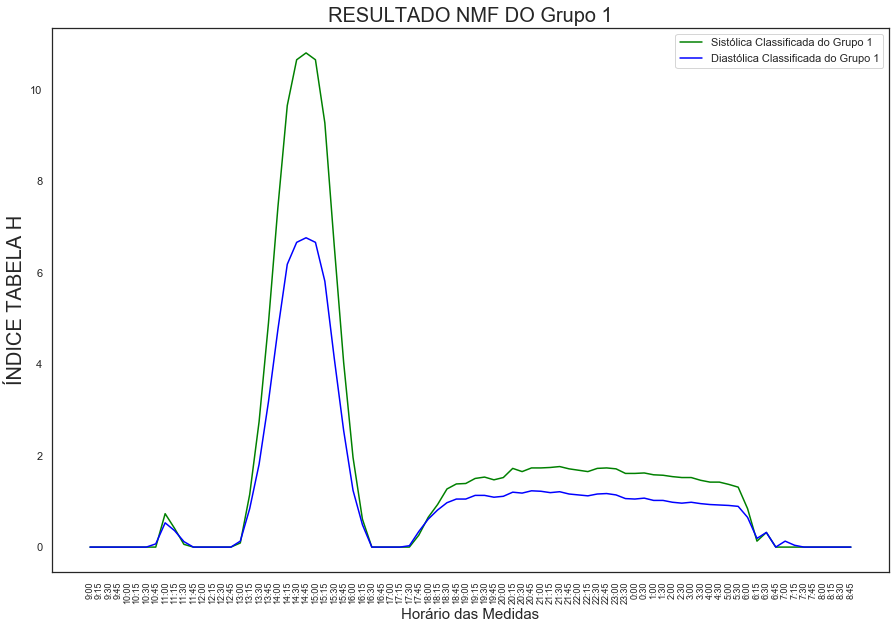

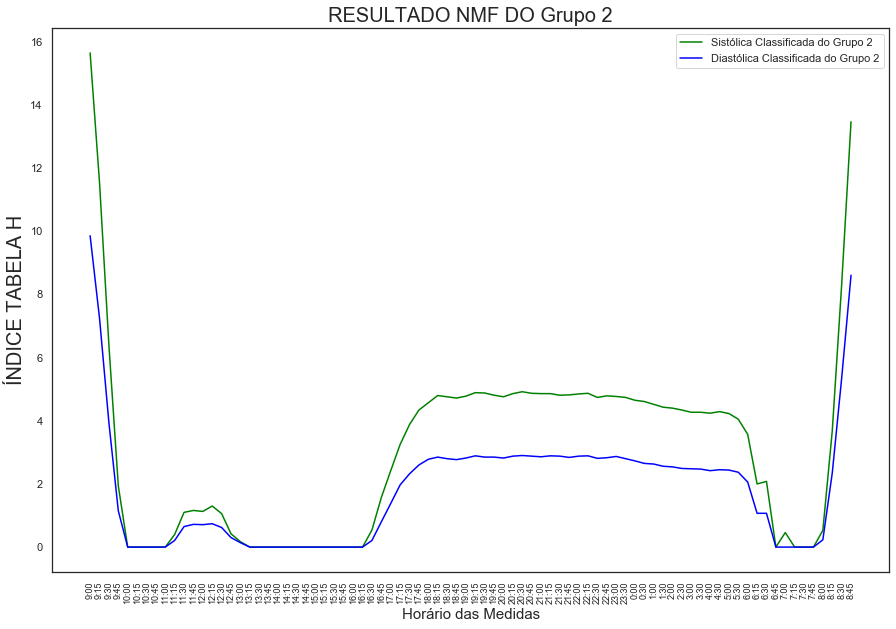

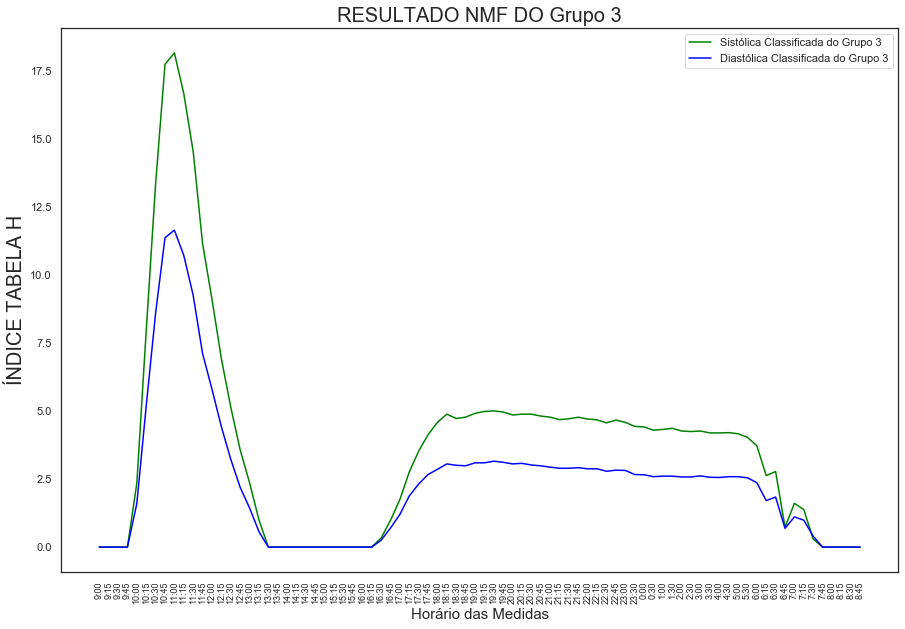

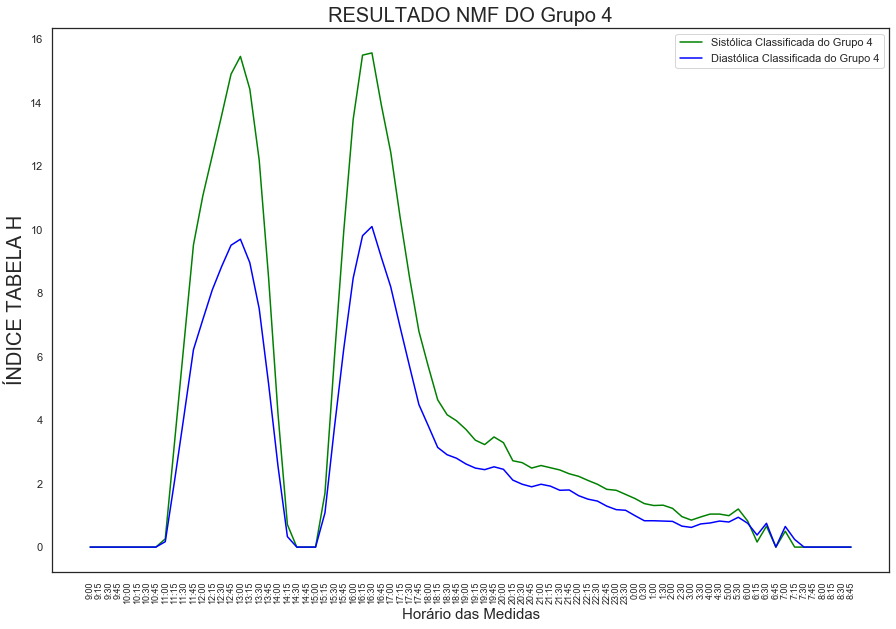

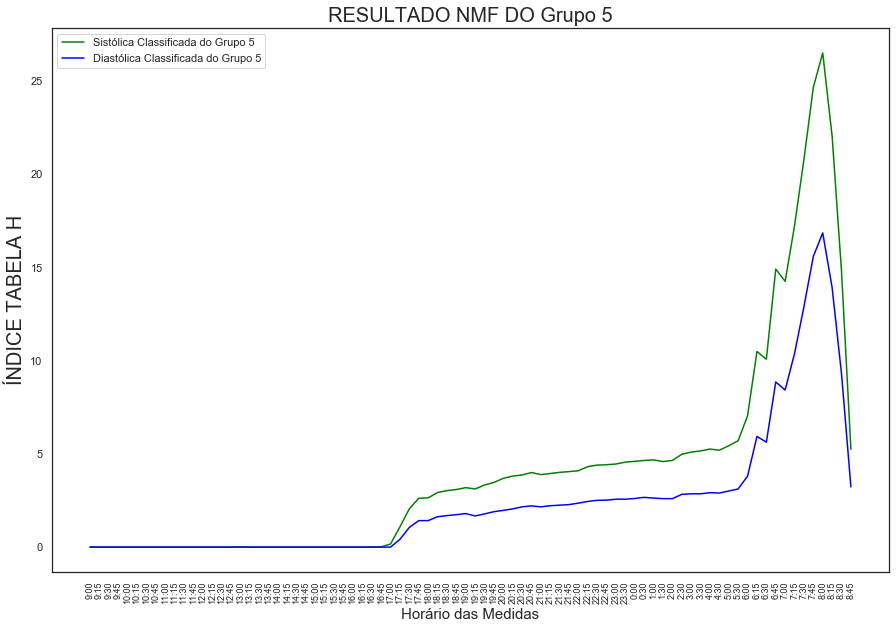

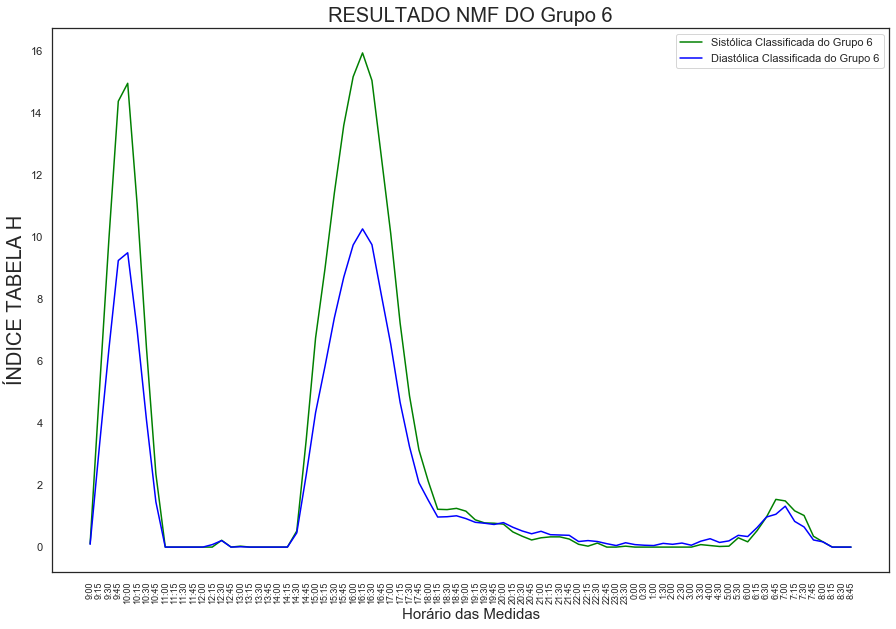

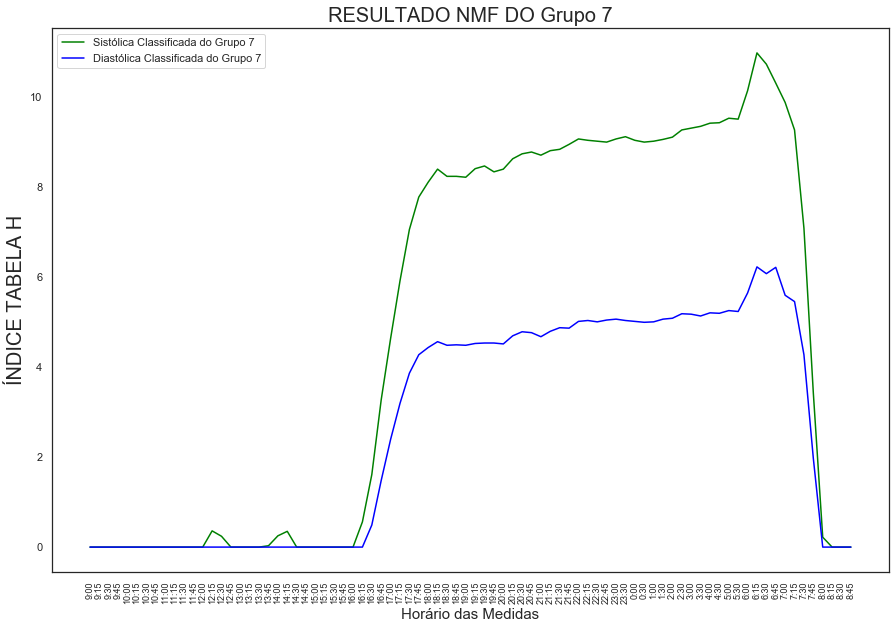

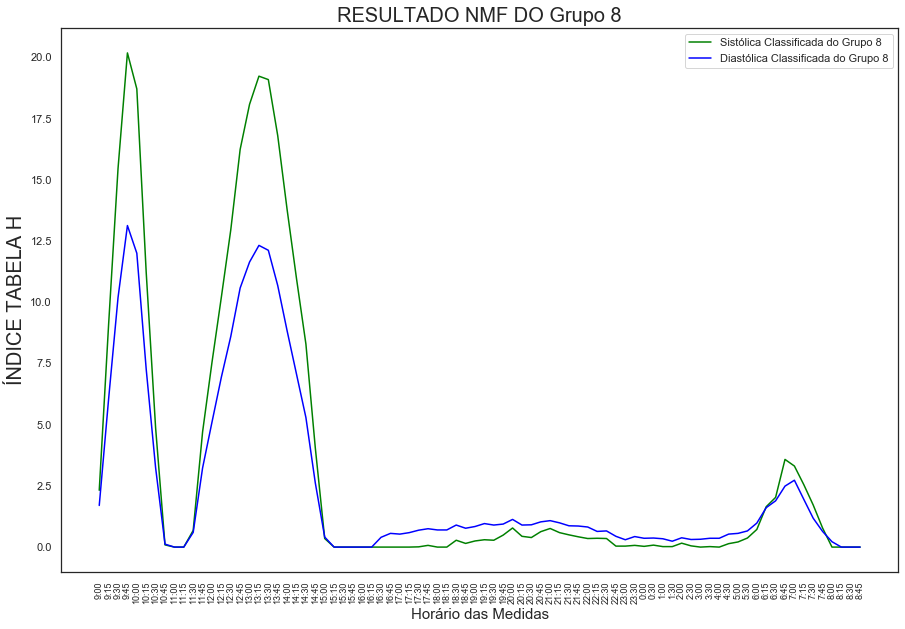

In [47]:
#      Plota os gráficos de cada grupo resultado do NMF

#   Transpose apenas para facilitar a montagem do grafico. As colunas se tornam linhas e vice-versa
df = pd.read_csv(DIR_NMF / "H.csv", delimiter=';', index_col=0).T

# prepara os dados para filtrar o que é Sistólica e o que é Diastólica
df['is_sist'] = ['sist' in i for i in df.index.values]
df['is_diast'] = ['diast' in i for i in df.index.values]

# divisão dos dados em Sistólica e Diastólica, respectivamente
df_sist = df[df['is_sist'] == True]
df_sist = df_sist.drop(columns=['is_sist', 'is_diast'])
# adiciona coluna apenas com o conteúdo do horário (sem a palavra sist/diast)
df_sist['sist_index'] = [i.replace('sist ', '') for i in df_sist.index.values]
# grava a 1a. coluna apenas com o horário
df_sist.set_index('sist_index', inplace=True)
print (df_sist)

df_diast = df[df['is_diast'] == True]
df_diast = df_diast.drop(columns=['is_sist', 'is_diast'])
df_diast['diast_index'] = [i.replace('sist ', '') for i in df_diast.index.values]
df_diast.set_index('diast_index', inplace=True)

# Plota os gráficos de cada grupo gerado pela tabela H que é a saída do NMF
# Grava cada gráfico em formato SVG

for grupo in df_sist.columns:
    f = plt.figure(figsize=(15, 10))

    # plota os pontos da sistólica em cada grupo
    y_sist = df_sist[grupo]
    # horários das medidas que serão os xticks
    x_sist = df_sist.index

    # Legenda da Sistólica
    plt.plot(x_sist, y_sist, color='green', label='Sistólica Classificada do '+str(grupo))
    
    # plota os pontos da diastólica em cada grupo baseado no eixo X = horários e eixo Y = números da matriz 
    y_diast = df_diast[grupo]

    # Legenda da Diastólica
    plt.plot(x_sist, y_diast, color='blue', label='Diastólica Classificada do '+str(grupo))
    plt.xticks(rotation=90, fontsize=9)


    plt.title('RESULTADO NMF DO '+str(grupo), fontsize=20)
    plt.xlabel('Horário das Medidas', fontsize=15)
    plt.ylabel('ÍNDICE TABELA H', fontsize=20)
    #plt.ylabel(grupo, fontsize=20)
    plt.legend()
    # Plota gráficos da tabela H em cada grupo 
    plt.savefig(DIR_NMF / f'NMF_classificado_{grupo}.svg',format="svg")
    #plt.savefig(DIR_NMF / 'NMF_classificado_'+str(grupo)+'.svg',format="svg")
    plt.show()


## Identificar as variaveis mais importantes para definir os Grupos de Pacientes (Random)

In [48]:
#importando a biblioteca
from sklearn.ensemble import RandomForestClassifier

In [49]:
#parametizando o random
random_forest = RandomForestClassifier(n_estimators=100)

In [50]:
dados_mapa

,numero_identificacao,data_nascimento,genero,idade,peso,altura,data_exame,sist 9:00,sist 9:15,sist 9:30,...,Mediana Sistolica em 24h,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica
0,4,1923-10-05,M,94.0,85.0,160,2018-09-10 12:25:23,105.0,108.0,116.0,...,118.5,59.0,9545.5,4902.0,3748.0,841.5,16.52,11.36,11,34
1,5,1948-10-07,M,70.0,80.0,165,2018-12-26 07:39:41,103.0,114.0,82.0,...,106.0,62.0,8586.5,5034.5,2915.0,606.0,7.51,6.65,9,23
2,6,1999-03-23,M,19.0,100.0,197,2018-12-26 08:06:19,147.0,148.0,156.0,...,133.0,79.0,10674.0,6154.0,3721.0,751.5,12.70,13.01,19,19
3,7,1978-01-26,F,40.0,65.0,"1,64",2018-12-26 08:19:06,140.0,139.0,142.0,...,131.0,80.0,10679.5,6420.5,3642.0,602.5,16.13,10.34,21,9
4,8,1990-03-07,M,28.0,120.0,172,2018-12-26 08:26:59,NaN,110.0,101.0,...,115.0,78.0,9141.5,6118.0,2405.0,566.0,12.27,12.79,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19556,21786,1972-11-25,M,47.0,75.0,165,2020-09-10 16:03:08,163.0,198.0,172.0,...,152.0,116.0,12224.5,9265.0,2439.0,474.5,18.66,14.80,49,60
19557,21787,1970-10-19,M,49.0,90.0,183,2020-09-10 16:21:02,114.0,120.0,164.0,...,136.0,85.0,10970.0,6819.0,3319.0,738.0,17.22,13.67,32,27
19558,21788,1985-03-15,F,35.0,93.0,167,2020-09-10 16:44:53,107.0,110.0,103.0,...,112.0,62.0,9245.0,4935.5,3556.0,713.5,14.36,8.29,14,26
19559,21792,1952-04-21,F,68.0,64.0,160,2020-09-10 17:25:50,94.0,107.0,112.0,...,109.5,68.0,8989.5,5660.0,2815.5,460.0,14.14,9.38,19,13


In [51]:
#treino
random_forest.fit(dados_sem_id,dados_mapa['grupo'])

KeyError: 'grupo'

In [ ]:
#cálculo da importância (com 3 casas decimais) de cada variável para identificar os grupos 
importances = pd.DataFrame({'feature':dados_sem_id.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [ ]:
#tabela com o grau de importancia de cada variavel(da mais importante pra menos) para separação dos grupos 

importances.to_csv(DIRETORIO_PRINCIPAL / "Random_Forest" /  "importancia_variaveis.csv", 
                   sep=";", encoding="latin1", index=True)
importances